In [ ]:
# Create a list
fruits = ["apple", "banana", "cherry"]

# Append a single element
fruits.append("orange")
print(fruits)

# Append a list (adds the entire list as a single item)
fruits.append(["grape", "mango"])
print(fruits)



['apple', 'banana', 'cherry', 'orange']
['apple', 'banana', 'cherry', 'orange', ['grape', 'mango']]


In [ ]:
# Create a list
fruits = ["apple", "banana", "cherry"]

# Extend the list with multiple elements
fruits.extend(["orange", "grape", "mango"])
print(fruits)



['apple', 'banana', 'cherry', 'orange', 'grape', 'mango']


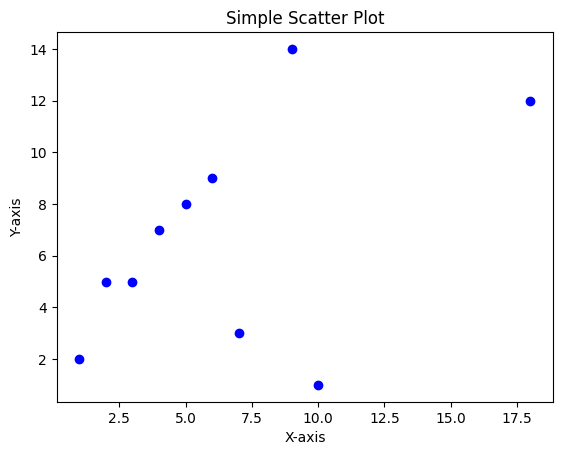

In [ ]:
import matplotlib.pyplot as plt
# Sample data (X and Y coordinates)
x = [1, 2, 3, 4, 5, 6, 7, 18, 9, 10]
y = [2, 5, 5, 7, 8, 9, 3, 12, 14, 1]

# Create scatter plot
plt.scatter(x, y, color='blue')

# Labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Simple Scatter Plot")

# Display plot
plt.show()


[(0, 10), (0, 10), (0, -10), (0, -10), (10, 0), (-10, 0), (10, 0), (-10, 0)]
[(0, 10), (0, 10), (0, -10), (0, -10), (10, 0), (-10, 0), (10, 0), (-10, 0), (1, 10), (-1, 10), (1, -10), (-1, -10), (10, 1), (-10, 1), (10, -1), (-10, -1)]
[(0, 10), (0, 10), (0, -10), (0, -10), (10, 0), (-10, 0), (10, 0), (-10, 0), (1, 10), (-1, 10), (1, -10), (-1, -10), (10, 1), (-10, 1), (10, -1), (-10, -1), (2, 10), (-2, 10), (2, -10), (-2, -10), (10, 2), (-10, 2), (10, -2), (-10, -2)]
[(0, 10), (0, 10), (0, -10), (0, -10), (10, 0), (-10, 0), (10, 0), (-10, 0), (1, 10), (-1, 10), (1, -10), (-1, -10), (10, 1), (-10, 1), (10, -1), (-10, -1), (2, 10), (-2, 10), (2, -10), (-2, -10), (10, 2), (-10, 2), (10, -2), (-10, -2), (3, 10), (-3, 10), (3, -10), (-3, -10), (10, 3), (-10, 3), (10, -3), (-10, -3)]
[(0, 10), (0, 10), (0, -10), (0, -10), (10, 0), (-10, 0), (10, 0), (-10, 0), (1, 10), (-1, 10), (1, -10), (-1, -10), (10, 1), (-10, 1), (10, -1), (-10, -1), (2, 10), (-2, 10), (2, -10), (-2, -10), (10, 2), (-10, 

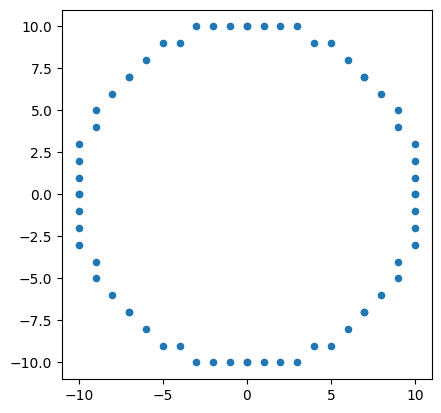

In [ ]:

def draw_circle(xc, yc, r):
    x, y = 0, r  #starting from the topmost point (0,𝑟) on the circle
    p = 1 - r    # Initial decision parameter to move East (E) or South-East (SE)
    points = []  # store the computed circle points

    def plot_circle_points(xc, yc, x, y):
        points.extend([(xc + x, yc + y), (xc - x, yc + y),
                       (xc + x, yc - y), (xc - x, yc - y),
                       (xc + y, yc + x), (xc - y, yc + x),
                       (xc + y, yc - x), (xc - y, yc - x)])

    plot_circle_points(xc, yc, x, y)

    while x < y:
        print(points)
        x = x + 1
        if p < 0:
            p += 2*x + 1  # Move Right
        else:
            y -= 1
            p += 2*x - 2*y + 1  # Move Diagonally

        plot_circle_points(xc, yc, x, y)

    # Plot the points
    #print(points)
    x_cordinate, y_cordinate = zip(*points)
    plt.scatter(x_cordinate, y_cordinate, s=20)
    plt.gca().set_aspect('equal')
    #plt.show()

# Example: Draw a circle with center (0,0) and radius 10
draw_circle(0, 0, 10)


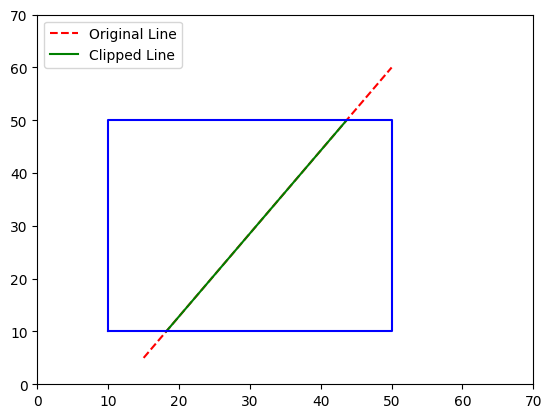

In [ ]:
# Cohen-Sutherland Line Clipping Algorithm

import matplotlib.pyplot as plt

# Define clipping window
xmin, ymin, xmax, ymax = 10, 10, 50, 50

# Define region codes
INSIDE = 0  # 0000
LEFT = 1    # 0001
RIGHT = 2   # 0010
BOTTOM = 4  # 0100
TOP = 8     # 1000

def compute_code(x, y):
    code = INSIDE
    if x < xmin:
      code = code | LEFT
    if x > xmax:
      code = code | RIGHT
    if y < ymin:
      code = code | BOTTOM
    if y > ymax:
      code = code | TOP
    return code

def cohen_sutherland_clip(x1, y1, x2, y2):
    code1 = compute_code(x1, y1)
    code2 = compute_code(x2, y2)
    accept = False

    while True:        # Infinite loop with two exit criteria.

        if code1 == 0 and code2 == 0:    #Trivial Accept
            accept = True
            break                        # Loop Exit criteria 1


        #if (code1&code2 != 0)⇒ Reject the line
        elif code1 & code2:              #Trivial Reject
            break                        # Loop Exit criteria 2
        else:
            if code1:
                code_out = code1
            else:
                 code_out = code2

            if code_out & TOP:
                x = x1 + (x2 - x1) * (ymax - y1) / (y2 - y1)
                y = ymax
            elif code_out & BOTTOM:
                x = x1 + (x2 - x1) * (ymin - y1) / (y2 - y1)
                y = ymin
            elif code_out & RIGHT:
                y = y1 + (y2 - y1) * (xmax - x1) / (x2 - x1)
                x = xmax
            elif code_out & LEFT:
                y = y1 + (y2 - y1) * (xmin - x1) / (x2 - x1)
                x = xmin

            if code_out == code1:
                x1, y1 = x, y
                code1 = compute_code(x1, y1)
            else:
                x2, y2 = x, y
                code2 = compute_code(x2, y2)

    if accept:
        return (x1, y1, x2, y2)
    else:
        return None

# Test line
x1, y1, x2, y2 = 15, 5, 50, 60

clipped_line = cohen_sutherland_clip(x1, y1, x2, y2)
fig, ax = plt.subplots()
ax.set_xlim(0, 70)
ax.set_ylim(0, 70)
ax.plot([x1, x2], [y1, y2], 'r--', label="Original Line")

if clipped_line:
    x1_clip, y1_clip, x2_clip, y2_clip = clipped_line
    ax.plot([x1_clip, x2_clip], [y1_clip, y2_clip], 'g-', label="Clipped Line")

# Draw clipping window
ax.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin], 'b-')


ax.legend()
plt.show()

